<a href="https://colab.research.google.com/github/saravan2/Learning_Python/blob/master/Sect8_GumbelGradientAscent_StudentVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 8 - Gumbel Distribution and Gradient Ascent

This notebook walks you through solving the Gumbel parameter estimation problem from the Section 8 handout using Gradient Ascent. Have fun! If you have any feedback, please send comments/criticism to crat@stanford.edu :)

For an amazing notebook focused on teaching MLE and the Gradient Ascent algorithm, please see Lisa Yan's notebook [here](http://web.stanford.edu/class/cs109/demos/gradient_ascent.zip).

# Setup and imports

Two great Python libraries to use for plotting and numerical computing are [Matplotlib](https://matplotlib.org/) and [numpy](https://docs.scipy.org/doc/numpy/reference/), respectively. We import these to use in the rest of the notebook.

Next, we set Numpy's random seed, which "makes the random numbers predictable" (from a [Stackoverflow response](https://stackoverflow.com/a/21494630/10661227)). Then, in the second cell below we sample 1300 data points from a Gumbel distribution, as in the section problem. Setting the random seed means that every time you run the notebook once through you will get the same data in this sample. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(17) # so that the function checking works

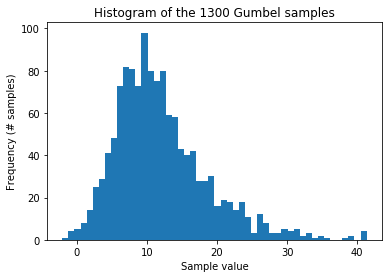

In [ ]:
size = (1300,)
mu = 9.0
beta = 5.2
y = np.random.gumbel(mu, beta, size=size)

plt.hist(y, bins=50)
plt.title('Histogram of the 1300 Gumbel samples')
plt.xlabel('Sample value')
plt.ylabel('Frequency (# samples)')
plt.show()

# Log likelihood and its partial derivatives

In the next few cells, you will write functions that find: 
1. $LL(\vec{y} | \mu, \beta)$, the log of the likelihood of the data $\vec{y}$ given the Gumbel parameters $\mu$ and $\beta$.
2. $\frac{\partial LL(\vec{y} | \mu, \beta)}{\partial \mu}$, the rate at which LL changes with respect to the Gumbel parameter $\mu$.
3. $\frac{\partial LL(\vec{y} | \mu, \beta)}{\partial \beta}$, the rate at which LL changes with respect to the Gumbel parameter $\beta$.

Your job is to fill in the functions 1-3 with the calculations derived in section. 

**Important:** Then, you can run the `##### CHECK #####` cells to determine if your implementation of each function is correct. You should see an output (difference from correct value) of close to zero.

In [ ]:
# returns the Log Likelihood of the DATA, given
# the passed gumbel parameters MU and BETA
def LL(data, mu, beta):
  N = len(data)
  z = (data - mu) / beta

  return -N*np.log(beta) + np.sum(-z - np.exp(-z))

In [ ]:
##### CHECK - LL function #####

corr1 = -4173.1866555869165
print(f'Difference: {np.abs(LL(y, mu, beta) - corr1)}')

corr2 = -6328.199705184027
print(f'Difference: {np.abs(LL(y, 1, 3) - corr2)}')

Difference: 0.0
Difference: 0.0


In [ ]:
# returns the partial derivative of the LL
# with respect to mu
def dLL_dmu(data, mu, beta):
  z = (data - mu) / beta
  return 1/beta*np.sum(1 - np.exp(-z))

In [ ]:
##### CHECK - dLL_dmu function #####

corr1 = 3.152905132435379
print(f'Difference: {np.abs(dLL_dmu(y, mu, beta) - corr1)}')

corr2 = 386.7646294573187
print(f'Difference: {np.abs(dLL_dmu(y, 1, 3) - corr2)}')

Difference: 0.0
Difference: 5.684341886080802e-14


In [ ]:
# returns the partial derivative of the LL
# with respect to beta
def dLL_dbeta(data, mu, beta):
  n = len(data)
  z = (data - mu) / beta

  return -n/beta + np.sum((-1 + np.exp(-z))*((mu-data) / beta / beta))

In [ ]:
##### CHECK - dLL_dbeta function #####

corr1 = -7.559053316295945
print(f'Difference: {np.abs(dLL_dbeta(y, mu, beta) - corr1)}')

corr2 = 1094.0290256744345
print(f'Difference: {np.abs(dLL_dbeta(y, 1, 3) - corr2)}')

Difference: 0.0
Difference: 0.0


# Exploring the log likelihood function $LL$

In the next few cells, we visualize the log likehood curve $LL(\vec{y} | \mu, \beta)$ in three different ways:
1. If we have the correct $\mu$, what does $LL$ look like as you vary $\beta$? **Note:** $\beta$ cannot be $\leq 0$. Why?
2. If we fix the correct $\beta$, what does $LL$ look like as you vary $\mu$?
3. Try to visualize the 3D $LL(\vec{y} | \mu, \beta)$.

**Note:** You don't have to worry about this code - just run the cells and see the results :)

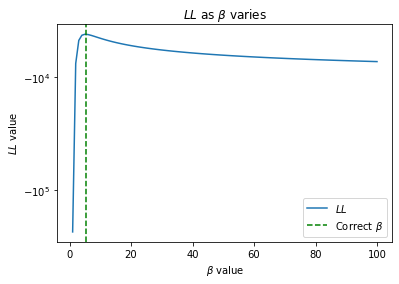

In [ ]:
beta_steps = np.linspace(1, 100, num=100)
LLs_mufix = [LL(y, mu, beta_step) for beta_step in beta_steps]

plt.plot(beta_steps, LLs_mufix, label='$LL$')
plt.axvline(x=beta, c='g', linestyle='--', label='Correct $\\beta$')

plt.yscale('symlog')
plt.title('$LL$ as $\\beta$ varies')
plt.xlabel('$\\beta$ value')
plt.ylabel('$LL$ value')
plt.legend()
plt.show()

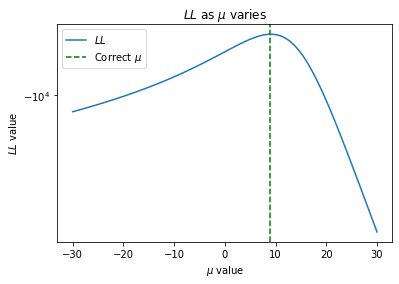

In [ ]:
mu_steps = np.linspace(-30, 30, num=100)
LLs_betafix = [LL(y, mu_step, beta) for mu_step in mu_steps]

plt.plot(mu_steps, LLs_betafix, label='$LL$')
plt.axvline(x=mu, c='g', linestyle='--', label='Correct $\\mu$')

plt.yscale('symlog')
plt.title('$LL$ as $\\mu$ varies')
plt.xlabel('$\\mu$ value')
plt.ylabel('$LL$ value')
plt.legend()
plt.show()

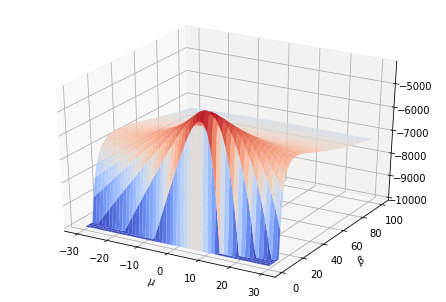

In [ ]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = Axes3D(fig)

mu_mesh, beta_mesh = np.meshgrid(mu_steps, beta_steps)
LL_steps = np.array([LL(y, mu_step, beta_step) for mu_step, beta_step in zip(mu_mesh.flatten(), beta_mesh.flatten())])
LL_steps[LL_steps < -1e4] = -1e4
LL_mesh = LL_steps.reshape(mu_mesh.shape)

ax.plot_surface(mu_mesh, beta_mesh, LL_mesh, cmap='coolwarm')
plt.xlabel('$\\mu$')
plt.ylabel('$\\beta$')
plt.show()

**Note:** I clipped some of the really low values in the plot above to $-1e4$. Notice that the peak occurs at $(\mu = 9, \beta = 5.3)$

# Gradient Ascent

Now let's perform gradient ascent to recover MLE parameters for the sampled data $\vec{y}$. That is, let's pretend the underlying $\mu$ and $\beta$ are unknowns then work our way backwards from the data $\vec{y}$ to find the most likely $\mu$ and $\beta$.

Complete the Gradient Ascent code below so that $\mu_{est} \to \mu$ and $\beta_{est} \to \beta$.

You should see small differences between the correct (underlying) mu, beta and our resulting estimates. Also, you should see a maximum log likelihood of around -4186.

In [ ]:
mu_est = 0
beta_est = 1

iters = 10000
learning_rate = 1e-4
stop_threshold = 1e-9 # stop when the update is this small
gradmus, gradbetas, lls, mu_ests, beta_ests = [], [], [], [], []
for i in range(iters):
  # Step 1) Obtain charectaristics of our point on the log likelihood curve
  ll = LL(y,mu_est,beta_est)
  gradmu = dLL_dmu(y,mu_est,beta_est)
  gradbeta = dLL_dbeta(y,mu_est,beta_est)
  
  # (Don't worry about this) Log some information
  gradmus.append(gradmu)
  gradbetas.append(gradbeta)
  lls.append(ll)
  mu_ests.append(mu_est)
  beta_ests.append(beta_est)
  
  # Step 2) Update parameters using gradient ascent
  mu_est = mu_est + learning_rate*gradmu
  beta_est = beta_est + learning_rate*gradbeta
  
  # Stop if the total distance we step if less than threshold
  if learning_rate*(np.abs(gradmu) + np.abs(gradbeta)) < stop_threshold:
    break

print(f'Converged to within {stop_threshold} in {i+1} iterations.')
print(f'Accuracy of parameter values: mu diff = {np.abs(mu-mu_est)}, beta diff = {np.abs(beta-beta_est)}')
print(f'Converged log likelihood: {lls[-1]}')

Converged to within 1e-09 in 4452 iterations.
Accuracy of parameter values: mu diff = 0.03282541773611136, beta diff = 0.07928519920766774
Converged log likelihood: -4172.829877553308


# Visualizing the Gradient Ascent Algorithm

Congratulations! Now you've implemented a gradient ascent algorithm that recovers underlying Gumbel parameters. Let's explore what is going on here.

In the first cell below, we plot the log likehood $LL$ of our estimated parameters $\mu_{est}$ and $\beta_{est}$ as a function of time step (a.k.a. iteration number). What iteration would be "sufficient" to stop at? Why?

Then, in the second cell below, we plot the parameter estimates $\mu_{est}$ and $\beta_{est}$ as a function of time step. What's going on with $\beta_{est}$? Why does it oscillate? Try to change the starting values of `beta_est` and `mu_est` so that $\beta_{est}$ doesn't oscillate like this. What happens?

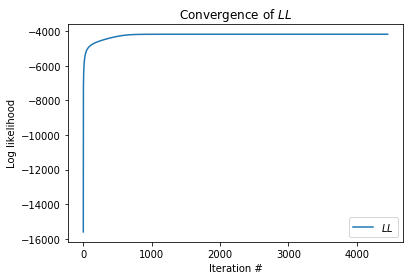

In [ ]:
plt.plot(lls)
plt.title('Convergence of $LL$')
plt.xlabel('Iteration #')
plt.ylabel('Log likelihood')
plt.legend(['$LL$'])
plt.show()

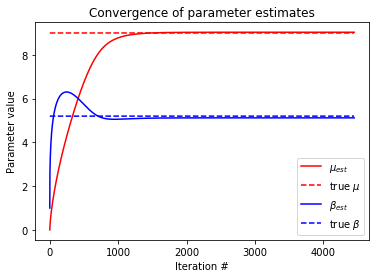

In [ ]:
plt.plot(mu_ests, color='r')
plt.plot([mu for t in range(i)], color='r', linestyle='--')
plt.plot(beta_ests, color='b')
plt.plot([beta for t in range(i)], color='b', linestyle='--')
plt.title('Convergence of parameter estimates')
plt.xlabel('Iteration #')
plt.ylabel('Parameter value')
plt.legend(['$\\mu_{est}$', 'true $\\mu$', '$\\beta_{est}$', 'true $\\beta$'])
plt.show()

# Exploring the Gradient Ascent Algorithm

Now let's play around with the gradient ascent algorithm you've implemented. Try changing the starting values of `mu_est` and `beta_est`, the `learning_rate` or the `stop_threshold`/`iters` variables to change the behaviour of the Gradient Ascent algorithm. For example:
1. Try to decrease `iters` as much as possible while keeping results similar.
2. Try to "break" the algorithm - can you get it to not converge, even if there's a high number of iterations?
3. Try to converge to within 0.05 of both true parameters **within 500 iterations** (i.e., `iters` = 500).
4. Think of another interesting task, and figure out how to do it! :D

Have fun!

